Accuracy: 0.975


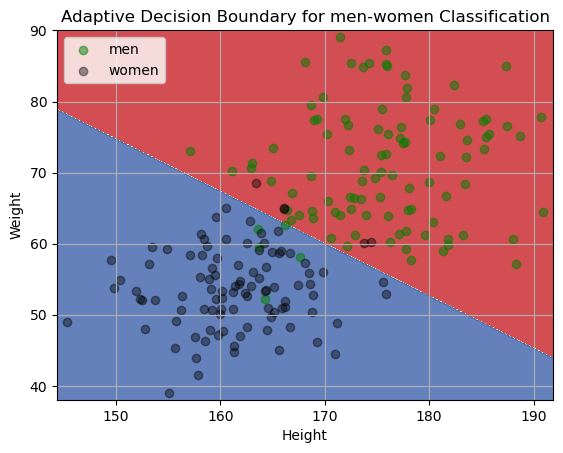

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the synthetic fish dataset from the Excel file
file_path = "ADB_men_women_dataset.xlsx"
data = pd.read_excel(file_path)

# Extract the features (length and weight) and target variable (species)
X = data[['height', 'weight']].values
y = data['gender'].values

# Map species to numerical values (0 for Salmon, 1 for Seabass)
species_mapping = {'men': 0, 'women': 1}
y = np.array([species_mapping[label] for label in y])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='men', color='green', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='women', color='black', alpha=0.4)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Adaptive Decision Boundary for men-women Classification')
plt.legend()
plt.grid(True)
plt.show()
